In [195]:
# İlk olarak Kütüphanelerimizi import ediyoruz.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [242]:
# Seaborn kütüphanesinde hazır olarak bize sunulan titanic veriseti üzerinde çalışacağız.

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
# Veri setimizin içeriğini kontrol ediyoruz.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [198]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [199]:
# Deck sütununda çok fazla eksik değer olması ve ihtiyacımız olmamasından dolayı bu sütunu kaldırıyoruz.

df.drop('deck',axis=1, inplace=True)

In [200]:
# Daha sonra yaş sütununu yaş ortalaması alarak dolduruyoruz.

df['age'].fillna(df['age'].mean(),inplace=True)

In [201]:
# Sonrasında eksik kalan diğer verileri verisetinden kaldırarak verisetimizi düzenliyoruz

df.dropna(inplace=True)

In [202]:
# Verisetimizi temizledikten sonra bilgilerini tekrar kontrol ediyoruz.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [203]:
# verimizin son halinin ilk 5 satırına bakıyoruz.

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [204]:
# Verisetimizden ihtiyacımız olan sütunları alıyor, ihtiyacımız olmayanları eliyoruz.

df = df[['survived','pclass','sex','age','fare','embark_town']]

In [205]:
df.head()

,survived,pclass,sex,age,fare,embark_town
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [206]:
# İçeriği numerik olan sütunlarımızı yazdırıyoruz.

num_cols = [col for col in df.columns if df[col].dtype!='O']
num_cols

['survived', 'pclass', 'age', 'fare']

In [207]:
# Şimdi Numerik olan değerlerin keşifsel bir analizini yapacağız.

# İlk olarak aşağıdaki gibi bir fonksiyon oluşturuyoruz.

def numerik_degisken(data):
    
    # Fonksiyon neye göre çalışacak ? - Numerik kolonları seçip onun üzerinde işlem yapacak.
    
    num_cols = [col for col in df.columns if df[col].dtype!='O']
    
    # Numerik kolonları seçtim şimdi ne yapayım ? - i diye bir değişkeni referans alarak numerik kolonların içinde gez diyoruz.
    
    for i in num_cols:
        
        # numerik kolonların arasında gezdim ve hepsini tek tek ele aldım, bunları ne yapacağız ? 
        # Subplot oluşturacağız tek satırda 3 tane grafik olacak ve boyutu 20 ye 5 olacak diyoruz.
        
        fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(20,5))
        
        # İlk olarak bana Histogram grafiği oluştur diyoruz. x in datası olarak gelen i değerini al ve 
        # 10 bar uzunluğunda bize göster diyoruz. Bu grafiği de ilk sütuna ekle diyoruz.
        
        sns.histplot(x=data[i], bins=10, ax=axes[0])
        axes[0].set_title(i)
        
        # sonrasında ise bir boxplot grafiği oluşturmak istediğimizi söylüyoruz.
        # Bunda da x 'i dataframe den gelen i den al diyoruz ve 2. sütuna eklemesi gerektiğini söylüyoruz.
        
        sns.boxplot(x = data[i], ax=axes[1])
        axes[1].set_title(i)
        
        # 3. ve son grafik için ise bir çizgi grafiği eklemek istediğimizi fonksiyona söylüyoruz.
        
        sns.kdeplot(x=data[i], ax = axes[2])
        axes[2].set_title(i)
        plt.show()

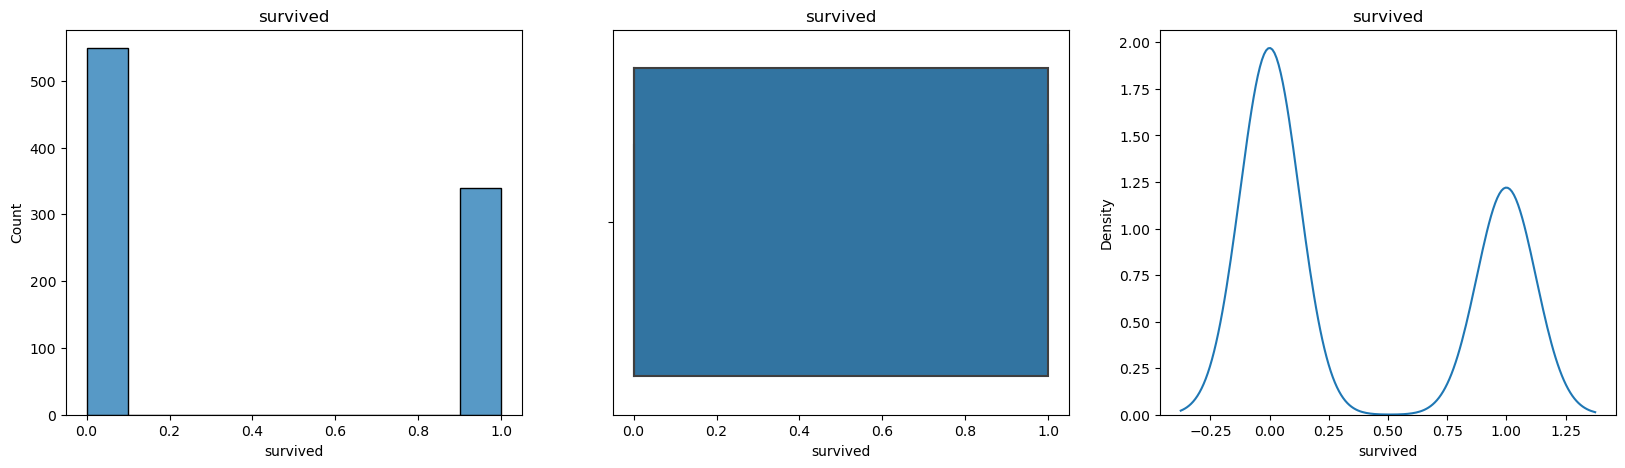

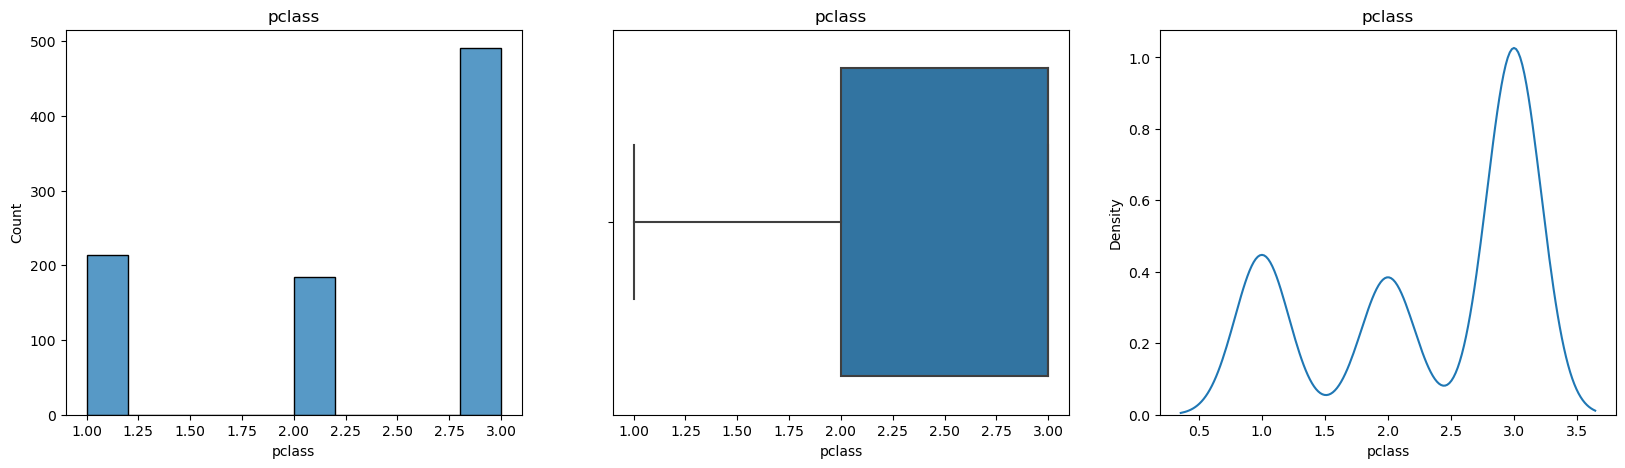

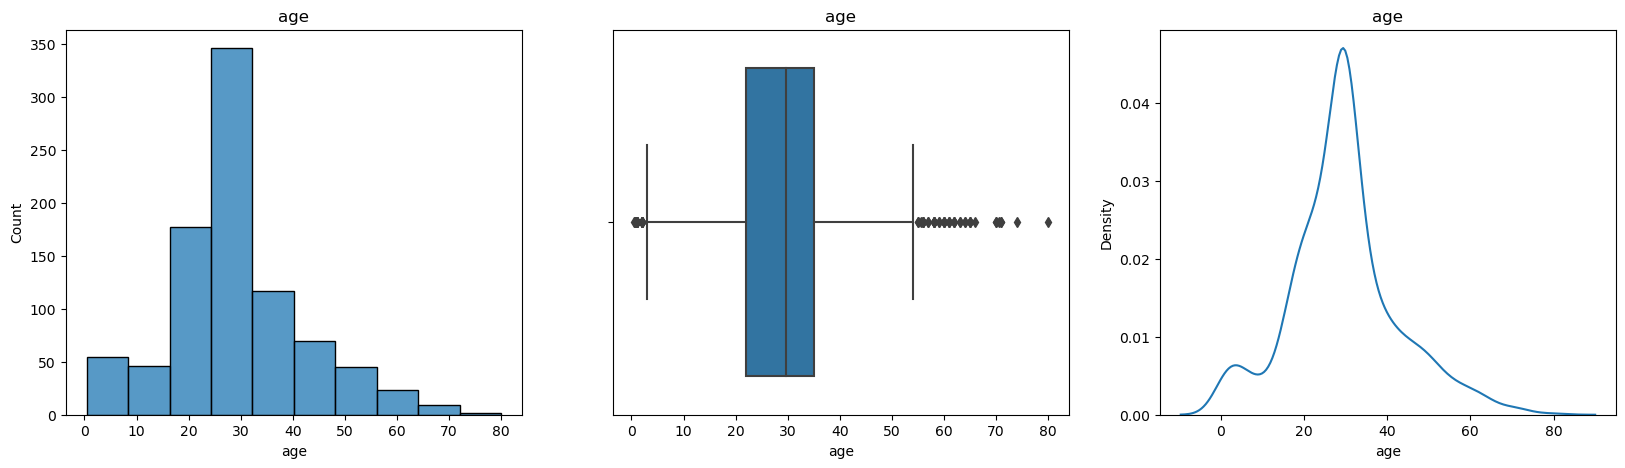

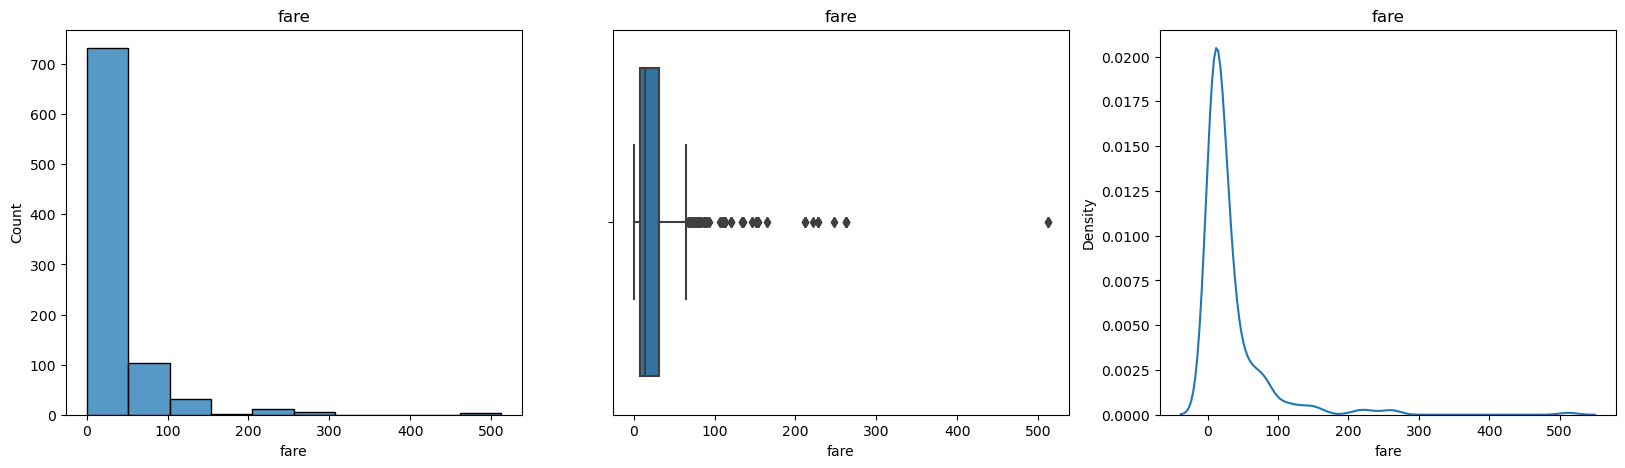

In [208]:
# Fonksiyonumuzun adını yazarak çalışmasını istediğimiz dataframe i belirtiyoruz.

numerik_degisken(df)

In [209]:
# Verisetimizi describe yapıp bir takım analizlere bakıyoruz.

df.describe()

,survived,pclass,age,fare
count,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,32.096681
std,0.486260,0.834700,12.968366,49.697504
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.895800
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [210]:
# Bu kod satırında kategorik değişkenlerin olduğu kolonları alıyoruz.

cat_cols = [col for col in df.columns if df[col].dtypes=='O']

# Kategorik değişkenler kaç adet değer içeriyor ona bakıyoruz

for i in cat_cols:
    unique_cols = df[i].unique()
    print(unique_cols)

['male' 'female']
['Southampton' 'Cherbourg' 'Queenstown']


In [211]:
# Kategorik değişkenleri grafik üzerinde keşifsel bir analizini yapmak için bir fonkisyon yazıyoruz.

def kategorik_degisken(data):
    cat_cols = [col for col in df.columns if df[col].dtypes=='O']
    
    for i in cat_cols:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
        
        # Bar plot
        sns.countplot(data=data, x = data[i], ax= axes[0])
        axes[0].set_title(i)
        
        # Pasta Grafiği
        data[i].value_counts().plot.pie(autopct='%1.1f%%', ax = axes[1])
        axes[1].set_title(i)
        
        

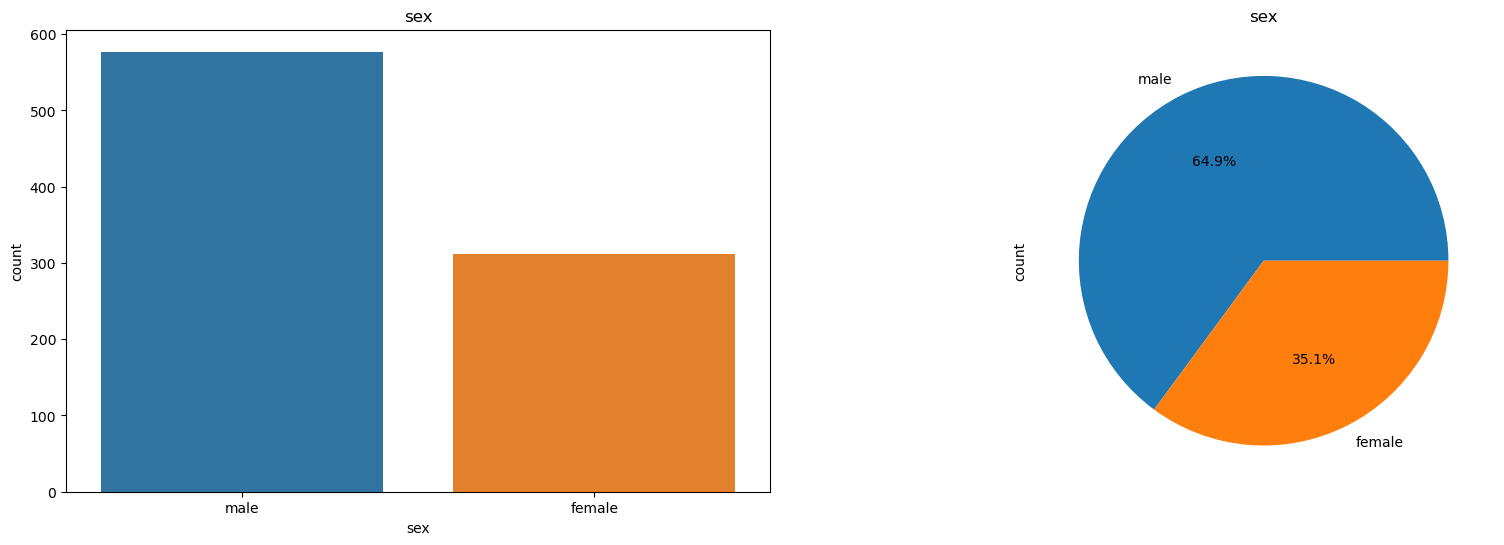

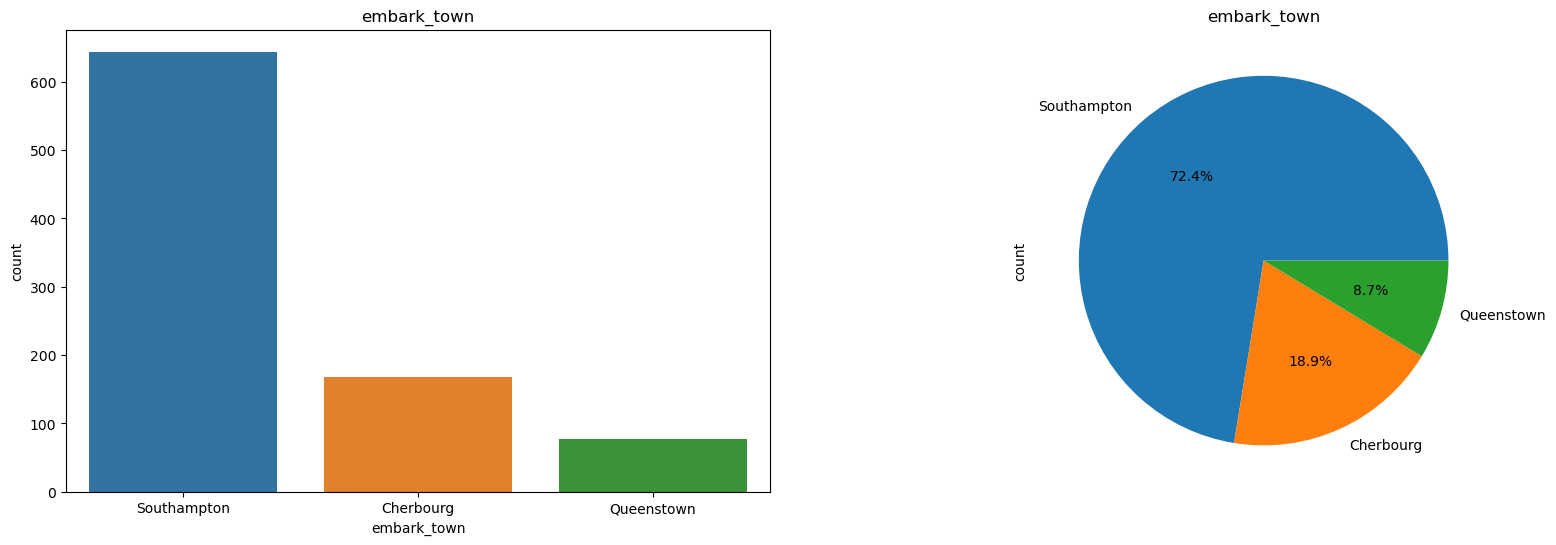

In [166]:
kategorik_degisken(df)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   fare         889 non-null    float64
 5   embark_town  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.6+ KB


In [213]:
# Keşifsel veri analizimizi yaptıktan sonra makine öğrenimi için verilerimizi düzenliyoruz.

# Kategorik verilerimizi numerik versiyona çevirip makine öğrenmesine hazırlıyoruz.

encoded = pd.get_dummies(df, columns = ['sex','embark_town'], dtype=int)

In [214]:
encoded.head()

,survived,pclass,age,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [136]:
# Verilerimizi hazırladıktan sonra hayatta kalanları tahmin etmek üzere bir makine öğrenmesi modeli yapacağız.

In [137]:
# İlk olarak x ve y değişkenlerimizi oluşturuyoruz. X değişkenine bilgileri verirken y değişkenini ise tahmin edeceğimiz
# hayatta kalma olarak belirliyoruz ve modelimizi elde ettiğimiz tüm veriler ile eğitip sonrasında tahmin yapıyoruz.

In [224]:
x_ham = encoded.drop('survived', axis=1)
y = encoded['survived']

In [225]:
# Tüm bunları yaptıktan sonra logaritmanın en iyi şekilde çalışması için verilerimize normalizasyon yapıyoruz.
# Normalizasyonu yaparken mixmaxscaler kütüphanesinden faydalanıyoruz.

scale = MinMaxScaler()
sc_df_ar = scale.fit_transform(x_ham)
x = pd.DataFrame(sc_df_ar)
x.columns = ['pclass','age','fare','sex_female','sex_male','embark_town_Cherbourg','embark_town_Queenstown',
             'embark_town_Southampton']
x

,pclass,age,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,1.0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
884,0.5,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0
885,0.0,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0
886,1.0,0.367921,0.045771,1.0,0.0,0.0,0.0,1.0
887,0.0,0.321438,0.058556,0.0,1.0,1.0,0.0,0.0


In [226]:
# x ve y değişkenlerini tanımladıktan sonra hem eğitim hemde test için kullanılması için aşağıdaki kod satırını yazıyoruz.

# Kod satırının anlamı ; hem x i hem de y ile eğit, sonrasında hem x i hemde y yi test et, verisetinin %80 nini eğitim,
# % 20 sini ise test olarak kullan ve bunu 1 kez döndür diyoruz.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [255]:
# KNN logaritmasını kullanarak tahminleme işlemi yapacağız.

# ilk olarak knn adlı bir değişkene KNN algoritmamızı tanımlayıp değer olarak 3 veriyoruz.
# sonrasında x ve y için hazırladığımız eğitim verilerini fit ediyoruz.
# tahmin yapabilmesi ve bu tahmini test edebilmesi için x_test parametremizi veriyoruz.
# En sonunda da modelimizin başarısına bakıyoruz. 0.73 ile çok iyi bir başarı olduğunu söyleyemeyiz.

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
knn.score(x_test,y_test)

0.8370786516853933

In [232]:
# KNN deki değeri kaç verirsek bize en iyi sonucu verir diye görebilmek adına bir döngü yazıyor 1 den 10 a kadar olan sayıların
# modelin başarısına nasıl etki edebileceğini görmeye çalışıyoruz.

# değeri görebilmek adına bir sayaç ekliyoruz.

# Çıkan sonuca göre en iyi 2 değerini verirsek bize %83.7 gibi bir oran ile tahmin sonucu verecektir.

sayac=1

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    print(sayac , 'değeri ile model başarısı %', knn.score(x_test,y_test))
    sayac += 1

1 değeri ile model başarısı % 0.8033707865168539
2 değeri ile model başarısı % 0.8370786516853933
3 değeri ile model başarısı % 0.8314606741573034
4 değeri ile model başarısı % 0.8314606741573034
5 değeri ile model başarısı % 0.7752808988764045
6 değeri ile model başarısı % 0.7808988764044944
7 değeri ile model başarısı % 0.7752808988764045
8 değeri ile model başarısı % 0.7921348314606742
9 değeri ile model başarısı % 0.7696629213483146
10 değeri ile model başarısı % 0.7921348314606742


In [240]:
x_ham.head()

,pclass,age,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1


In [239]:
# %83 lük bir başarı ile modeli kurduktan sonra aşağıdaki gibi ibareler ile bir tahmin yazıyoruz.
# 1. sınıf, 45 yaşında, 65.6555 dolara bilet alan, erkek olan ve southamptondan binen bir yolcu hayatta kaldı mı ? 
# Sonuç 0 yani hayatta kalmadığını bize söylüyor.

prediction_cl = knn.predict(scale.transform(np.array([[1, 45, 65.6555, 0, 1, 0, 0, 1]])))
prediction_cl[0]

0